# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2024-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>
**Integrantes:** Diego Olivares, Amelie Ramirez y Zhibin Xue <br>

# <h1><center>Análisis de Tendencias en Videos Musicales de YouTube: Patrones que Influyen en el Éxito de los Videos Musicales</center></h1>

## Introducción

Debido a la gran cantidad de información extraida se tomó la decisión de crear tres ``noteboks`` distintos para la recolección de datos estos se guardaran en la carpeta ``data/`` al igual que la información recolectada:

Estos se tienen que ejecutar en este orden:
1. ``youtube.ipynb``
2. ``spotify.ipynb``
3. ``last.fm.ipynb``

## Imports

In [52]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Contexto y motivación

En el contexto de la gran era de la digitalización, la humanidad ha creado nuevos inventos que transforman la manera en que se consume la música. Hoy en día, escuchar música a través de aparatos electrónicos como celulares, computadoras y radios se ha convertido en una práctica común y accesible. Este avance ha propiciado el surgimiento de nuevas formas de interacción y personalización para los usuarios.

Entre estas aplicaciones se encuentra *Spotify*, una plataforma de streaming de música que ofrece una experiencia única y personalizada. Spotify permite a sus usuarios crear y escuchar playlists adaptadas a sus gustos, gracias a algoritmos avanzados que analizan las preferencias musicales y sugieren nuevas canciones basándose en los patrones de escucha. Su capacidad para ofrecer este tipo de productos ha hecho que destaque como una de las aplicaciones más populares a nivel mundial.

Por otro lado, *YouTube* es conocida como una de las plataformas de videos más influyentes del mundo. Originalmente fue creada con el objetivo de compartir videos de diferentes tipos, pero se ha adaptado al contenido musical. Emplea un sofisticado algoritmo que sugiere contenido relevante a sus usuarios, creando una experiencia individualizada y adaptada a sus intereses. Esto la convierte en una herramienta clave para descubrir nuevos artistas.

Por último, *Last.fm* se presenta como una red social con un enfoque exclusivo en la música. Utilizando su sistema de 'scrobbling', registra las canciones que los usuarios escuchan en diversas plataformas para futuras recomendaciones. Esta facilita la interacción entre personas con gustos similares y proporciona estadísticas sobre las preferencias de los usuarios.

Estos desarrollos representan un avance significativo en la digitalización musical, ayudando a los artistas a alcanzar un reconocimiento de talla mundial. Pero, ¿qué es lo que define un éxito mundial? La música, acompañante constante de la humanidad a través de las épocas, sigue usando elementos similares como el ritmo, la letra y las tonalidades. Sin embargo, solo unas pocas melodías logran sobresalir y convertirse en fenómenos globales. Entonces, ¿qué parámetros determinan el éxito de una canción?

Al unir estas ideas - el uso de las aplicaciones y las preguntas sobre qué hace que una canción sea famosa - podemos adoptar un enfoque basado en el análisis de datos para investigar estos casos. Así surge nuestro proyecto: identificar, a través de las API de las aplicaciones antes mencionadas, los factores que contribuyen a que una canción se convierta en un hit mundial. Queremos explorar si existe alguna relación entre las canciones más populares, determinar patrones en sus lanzamientos y responder otras preguntas clave.

La motivación detrás de esto es ofrecer información valiosa a artistas y productoras musicales que buscan maximizar el alcance de sus lanzamientos. Pequeñas acciones de marketing, como elegir etiquetas adecuadas, seleccionar el horario y la fecha de lanzamiento más efectivos, entre otros factores, pueden hacer la diferencia en el éxito de una canción. Nuestra investigación tiene como objetivo proporcionar estos aportes y contribuir al crecimiento del panorama musical en la era digital.

## Preguntas objetivo

De las preguntas originales, se pudieron responder las siguientes:

1. ¿Qué características de los videos están más correlacionadas con un mayor número de visualizaciones? (likes, comentarios y etiquetas)

2. ¿La popularidad de una canción en otras plataformas como Spotify o Last.fm precede a su éxito en YouTube?

3. ¿Qué géneros musicales generan más interacciones en YouTube, y cómo esto se relaciona con las tendencias de escucha en Spotify o Last.fm?

4. ¿Cuál es la relación entre el número de visualizaciones en YouTube y la popularidad en Spotify? ¿A qué se debe?

5. ¿Cómo varía la tendencia de videos populares según la región?¿Y cómo esto refleja la cultura musical del país?

6. ¿Hay patrones de días u horarios en que se suben los videos más exitosos?

Las nueas preguntas que surgieron son:

1. ¿Qué categorias están más relacionadas entre si?

2. ¿Se puede hacer un modelo para predecir que tan popular será una canción en spotify en base a su éxito en Youtube?

## Análisis exploratorio de datos

### 1. ¿Qué características de los videos están más correlacionadas con un mayor número de visualizaciones? (likes, comentarios y etiquetas)

In [3]:
# Creamos un dataframe en conjunto para el análisis

yt_chile = pd.read_csv("data/videos_chile.csv")
yt_global = pd.read_csv("data/videos_global.csv")
yt_eeuu = pd.read_csv("data/videos_eeuu.csv")

yt_merged = pd.concat([yt_global, yt_eeuu, yt_chile]).drop_duplicates().reset_index(drop=True)
yt_merged


,Titulo,Vistas,Likes,Comentarios,Fecha,Tags
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57']
1,YoungBoy Never Broke Again - Sneaking [Officia...,1029066,75819,3901,2024-11-08T03:41:23Z,[]
2,YoungBoy Never Broke Again - Killa Season [Off...,1164882,81449,4392,2024-11-08T04:16:17Z,[]
3,YoungBoy Never Broke Again - Missing Everythin...,1132351,86119,6341,2024-11-08T02:20:12Z,[]
4,YoungBoy Never Broke Again - Catch Me [Officia...,812399,55568,2963,2024-11-08T02:20:09Z,[]
...,...,...,...,...,...,...
82,"LIT killah, TULI - MALA SUERTE (Official Video)",514359,51016,1321,2024-11-08T22:00:07Z,"['#MALASUERTE', '#TULI']"
83,Pac-Man vs Kirby. Épicas Batallas de Rap del F...,428853,50316,4518,2024-11-07T20:00:06Z,[]
84,"Valentino merlo, Salastkbron - Me voy (Officia...",713734,27106,1267,2024-11-07T23:00:08Z,[]
85,Lo Grande Que Es Perdonar (feat. Gilberto Sant...,680358,3230,30,2024-11-01T04:00:21Z,[]


<Axes: xlabel='Vistas', ylabel='Likes'>

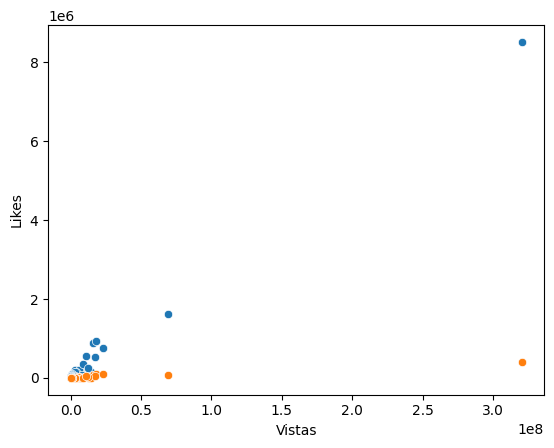

In [3]:
# Revisamos las correlaciones

sns.scatterplot(x='Vistas', y='Likes', data=yt_merged)
sns.scatterplot(x='Vistas', y='Comentarios', data=yt_merged)

In [ ]:
correlaciones = yt_merged[["Vistas", "Likes", "Comentarios"]]

maximo_comentarios = correlaciones["Comentarios"].max()
print(maximo_comentarios)

maximo_vista = correlaciones["Vistas"].max()
print(maximo_comentarios)
#sns.pairplot(correlaciones)

<Axes: xlabel='Vistas', ylabel='Likes'>

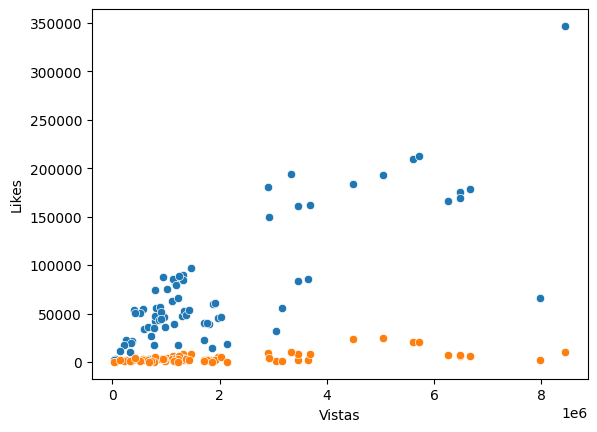

In [5]:
# Quitamos los datos mayores puesto que hacen que el rango sea muy grande
correlaciones = correlaciones[correlaciones["Comentarios"] < 390972]
correlaciones = correlaciones[correlaciones["Vistas"] < 8515277]

sns.scatterplot(x='Vistas', y='Likes', data=correlaciones)
sns.scatterplot(x='Vistas', y='Comentarios', data=correlaciones)


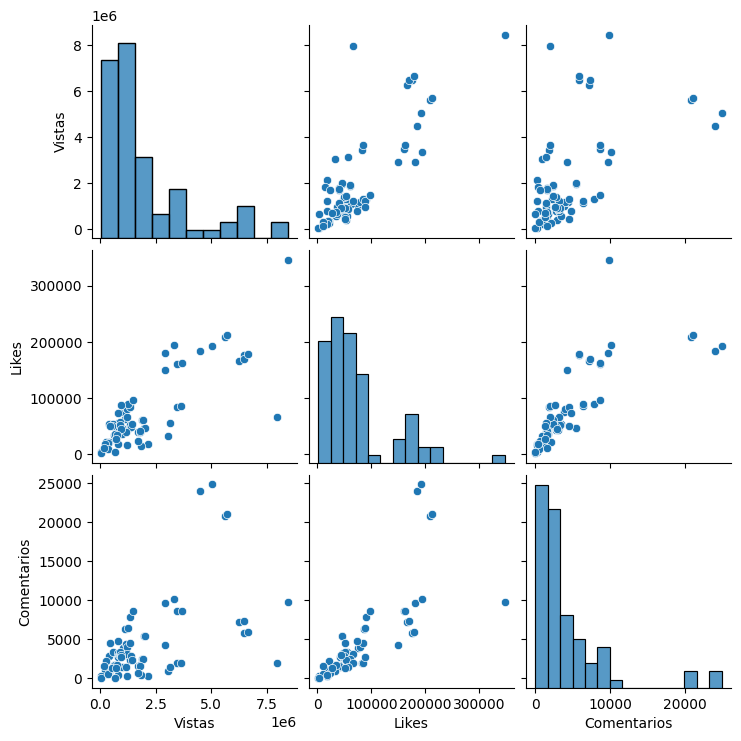

In [6]:
sns.pairplot(correlaciones)

<Axes: >

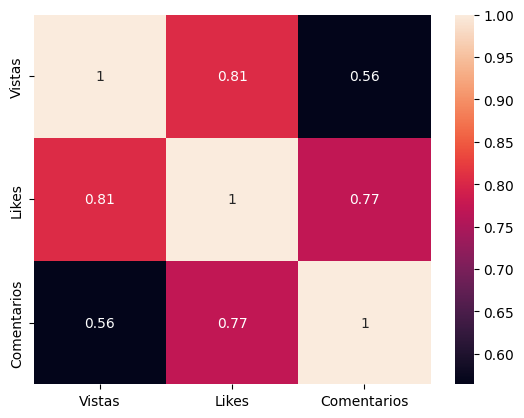

In [7]:
sns.heatmap(correlaciones.corr(),annot=True)

### 2. ¿La popularidad de una canción en otras plataformas como Spotify o Last.fm precede a su éxito en YouTube?

In [ ]:
# Para responder estas preguntas analizaremos cuantas peliculas están dentro de los dos dataframes

sp_chile = pd.read_csv("data/spotify_chile.csv")
sp_global = pd.read_csv("data/spotify_global.csv")
sp_eeuu = pd.read_csv("data/spotify_eeuu.csv")
sp_merged = pd.concat([sp_global, sp_eeuu, sp_chile]).drop_duplicates().reset_index(drop=True)

last_chile = pd.read_csv("data/last.fm_chile.csv")
last_global = pd.read_csv("data/last.fm_global.csv")
last_eeuu = pd.read_csv("data/last.fm_eeuu.csv")
last_merged = pd.concat([last_global, last_eeuu, last_chile]).drop_duplicates().reset_index(drop=True)

In [37]:
# Para responder esta pregunta creamos un csv con las canciones en tendencia en spotify buscadas en youtube

yt_spotify_1 = pd.read_csv("data/videos_spotify_global.csv")
yt_lastf_1 = pd.read_csv("data/videos_last.fm_global.csv")
yt_global_1 = pd.read_csv("data/videos_global.csv")
yt_global_1

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08T00:00:06Z,['#57']
1,YoungBoy Never Broke Again - Sneaking [Officia...,1029066,75819,3901,2024-11-08T03:41:23Z,[]
2,YoungBoy Never Broke Again - Killa Season [Off...,1164882,81449,4392,2024-11-08T04:16:17Z,[]
3,YoungBoy Never Broke Again - Missing Everythin...,1132351,86119,6341,2024-11-08T02:20:12Z,[]
4,YoungBoy Never Broke Again - Catch Me [Officia...,812399,55568,2963,2024-11-08T02:20:09Z,[]
5,"Dos Días - Tito Double P, Peso Pluma (Video Of...",13362287,149392,3065,2024-11-01T01:00:08Z,"['#TitoDoubleP', '#DosDias']"
6,Yailin La Mas Viral - Bing Bong (Video Oficial),4486001,183876,23990,2024-11-06T00:00:06Z,['#bingbong']
7,St. Chroma,9767138,267970,13910,2024-10-28T10:02:12Z,[]
8,Rod Wave - Westside Connection (Official Video),408447,53480,2899,2024-11-11T05:00:07Z,['#LastLap']
9,Nino Paid - Play This At My Funeral (Official ...,1118910,63121,3115,2024-11-04T17:00:06Z,[]


In [45]:
# Intersección de la columna 'Titulo'
interseccion_titulos = pd.merge(yt_spotify_1[['Titulo']], yt_global_1[['Titulo']], on='Titulo', how='inner')
interseccion_titulos.drop_duplicates().reset_index(drop=True)

,Titulo
0,St. Chroma
1,"Darling, I"


In [46]:
# Intersección de la columna 'Titulo'
interseccion_titulos = pd.merge(yt_lastf_1[['Titulo']], yt_global_1[['Titulo']], on='Titulo', how='inner')
interseccion_titulos.drop_duplicates().reset_index(drop=True)

,Titulo
0,St. Chroma
1,"Darling, I"
2,Sticky


In [47]:
# Intersección de la columna 'Titulo'
interseccion_titulos = pd.merge(yt_spotify_1[['Titulo']], yt_lastf_1[['Titulo']], on='Titulo', how='inner')
interseccion_titulos.drop_duplicates().reset_index(drop=True)

,Titulo
0,"Lady Gaga, Bruno Mars - Die With A Smile (Offi..."
1,Sailor Song
2,St. Chroma
3,"Billie Eilish, Khalid - lovely"
4,Sabrina Carpenter - Please Please Please (Offi...
5,ROSÉ & Bruno Mars - APT. (Official Music Video)
6,"Good Luck, Babe!"
7,Wiz Khalifa - See You Again ft. Charlie Puth [...
8,Sabrina Carpenter - Espresso (Official Video)
9,Like Him


### 3. ¿Qué géneros musicales generan más interacciones en YouTube, y cómo esto se relaciona con las tendencias de escucha en Spotify o Last.fm?

In [22]:
# Función para identificar géneros en Tags
def identificar_genero(tags):
    generos = ['Pop', 'Rock', 'Reggaetón', 'Hip-Hop', 'Electrónica', 'Country', 'Jazz']
    for genero in generos:
        if genero.lower() in tags.lower():
            return genero
    return 'Otros'

# Crear columna Género en yt_merged
yt_merged['Género'] = yt_merged['Tags'].apply(identificar_genero)

# Agrupar por género y calcular métricas totales
yt_genres = yt_merged.groupby('Género')[['Vistas', 'Likes', 'Comentarios']].sum().reset_index()
yt_genres


,Género,Vistas,Likes,Comentarios
0,Otros,681165427,20266563,1205653
1,Rock,2928352,150038,4297


In [23]:
# Extraer géneros de YouTube
yt_merged['Género'] = yt_merged['Tags'].apply(identificar_genero)

# Agrupar por género y sumar métricas de interacción
yt_genres = yt_merged.groupby('Género')[['Vistas', 'Likes', 'Comentarios']].sum().reset_index()


In [24]:
sp_genres = sp_merged.groupby('Generos')[['Popularidad']].sum().reset_index()

In [25]:
last_genres = last_merged.groupby('Generos')[['Oyentes']].sum().reset_index()

In [ ]:
# Combinar datos de YouTube y Spotify
yt_sp_combined = pd.merge(yt_genres, sp_genres, how='outer', left_on='Género', right_on='Generos')

# Combinar con datos de Last.fm
merged_genres = pd.merge(yt_sp_combined, last_genres, how='outer', left_on='Género', right_on='Generos')

merged_genres = merged_genres.fillna(0)  
merged_genres.head()

,Género,Vistas,Likes,Comentarios,Generos_x,Popularidad,Generos_y,Oyentes
0,Otros,681165427.0,20266563.0,1205653.0,0,0.0,0,0.0
1,Rock,2928352.0,150038.0,4297.0,0,0.0,0,0.0
2,0,0.0,0.0,0.0,0,0.0,"['80s', 'classic rock', 'rock']",1748226.0
3,0,0.0,0.0,0.0,0,0.0,"['80s', 'electronic', 'new wave']",1600456.0
4,0,0.0,0.0,0.0,0,0.0,"['80s', 'new wave', 'alternative']",5394925.0


### 4. ¿Cuál es la relación entre el número de visualizaciones en YouTube con la popularidad en Spotify y los oyentes en Last.fm? ¿A qué se debe?

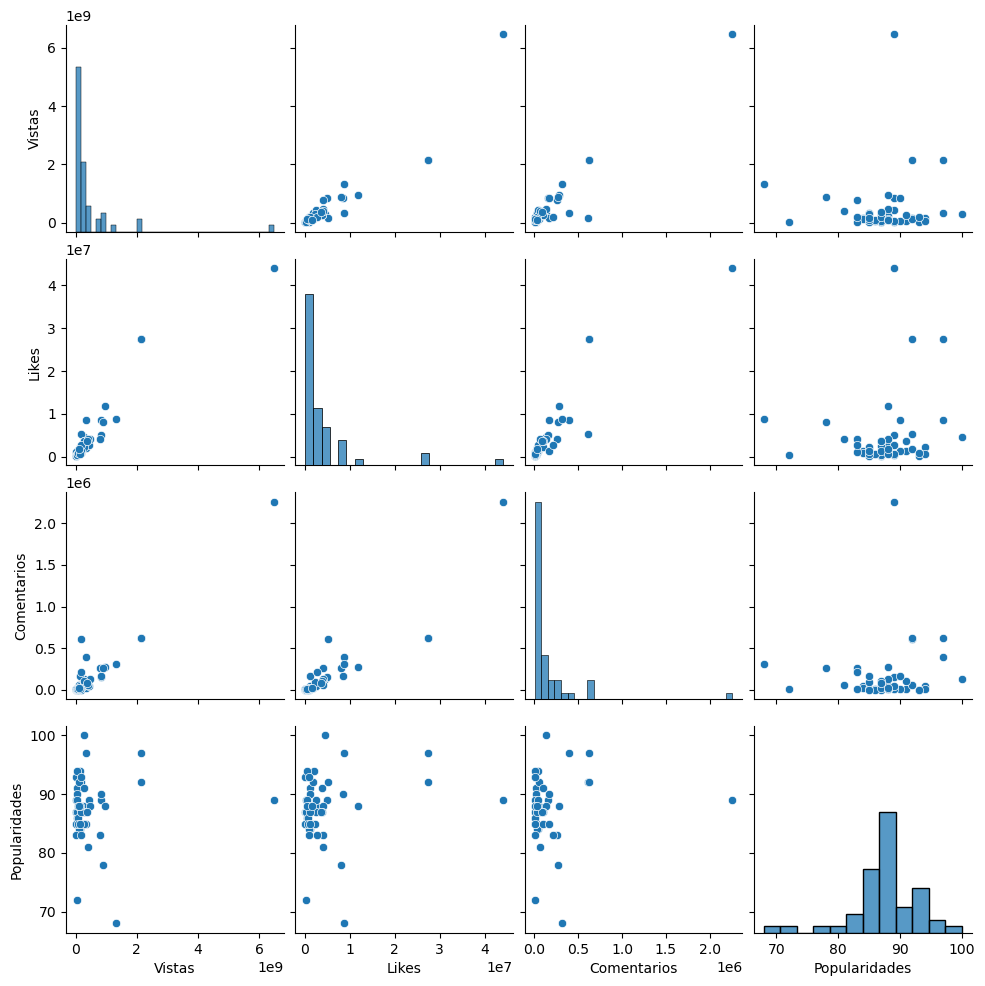

In [ ]:
#leemos el archivo videos_spotify_global.csv 
yt_spotify = pd.read_csv("data/videos_spotify_global.csv")
#sacamos las columnas de interes para saber como se relacionan con las dos variables mencionadas
columns = ['Vistas', 'Likes', 'Comentarios', 'Popularidades']
df_principal = yt_spotify[columns]
#hacemos una vista general de cuales serian las posibles variantes que nos ayudarian a responder la pregunta
graficos = sns.pairplot(df_principal)

In [48]:
#vamos a ver cual es el maximo del df para poder eliminar los outliers
max = df_principal.max()
#hacemos limpieza de outliers
df_principal = df_principal[df_principal['Vistas'] < max['Vistas']]
df_principal.max()

Vistas           2138326363
Likes              27467850
Comentarios          626681
Popularidades           100
dtype: int64

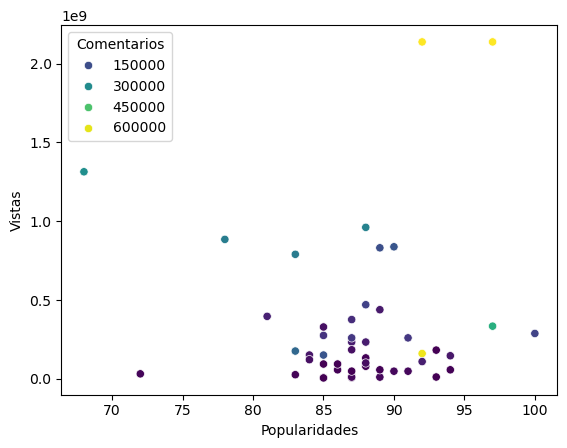

In [49]:
#hacemos una vista general de cuales serian las posibles variantes que nos ayudarian a responder la pregunta
sns.scatterplot(x="Popularidades", y="Vistas", hue="Comentarios", palette="viridis", data=df_principal)
plt.show()

In [63]:
#crearemos una regresion lineal para poder ver como se comporta la relacion entre las dos variables
#importar y crear nuestro transformador de valores X que depndera del gradp que queremos ocupar
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train, test = train_test_split(df_principal, test_size=0.25, random_state=42)
y_train = np.array(train.Vistas)
y_test = np.array(test.Vistas)


X_train = np.array(train.Popularidades)

X_train = X_train.reshape(X_train.shape[0], 1)


X_test = np.array(test.Popularidades)
X_test = X_test.reshape(X_test.shape[0], 1)
transformer = PolynomialFeatures(14, include_bias=False)
expanded_test = transformer.fit_transform(X_test)
expanded_train = transformer.fit_transform(X_train)

#entrenar nuestro modelo coon los valores expandidos
reg_poly = LinearRegression().fit(expanded_train, y_train)

#realizar predicciones
y_pred_train = reg_poly.predict(expanded_train)
y_pred_test = reg_poly.predict(expanded_test)

print('coeficientes del modelo: \n', reg_poly.intercept_, reg_poly.coef_[0], reg_poly.coef_[1])

#evaluar rendimiento
rmse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('\nConjunto de entrenamiento')
print('RMSE (train)', rmse_train)
print('R2(train)', r2_train)
print('\nConjunto de prueba')
print('RMSE (test)', rmse_test)
print('R2 (test)', r2_test)

coeficientes del modelo: 
 -5124929575.995117 3.7351867189492196e-23 4.271341677838883e-12

Conjunto de entrenamiento
RMSE (train) 2.2381369403418896e+17
R2(train) 0.13150044957079476

Conjunto de prueba
RMSE (test) 3.046839210641725e+17
R2 (test) -1.8372167687821603


In [ ]:
#graficar regresion
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

ax.plot(train.lstat, train.medv, 'o', color='green',label='Train', markersize=4) 
ax.plot(test.lstat, test.medv, '.', markersize=4, mec='blue', mfc='None', label='Test') 


x_vals = np.linspace(np.min(train.lstat), np.max(train.lstat), 100).reshape(-1,1)

expanded_x_vals = transformer.fit_transform(x_vals)

y_values  = reg_poly.predict(expanded_x_vals)

ax.plot(x_vals, y_values, label='Prediction', color='k', ls='--')
ax.set_xlabel("lstat", fontsize=12)
ax.set_ylabel("medv", fontsize=12)
ax.legend()

### 5. ¿Cómo varía la tendencia de videos populares según la región?¿Y cómo esto refleja la cultura musical del país?

### 6. ¿Hay patrones de días u horarios en que se suben los videos más exitosos?

In [ ]:
import pandas as pd
#hacemos copia del dataframe
#dividimos la columna fecha en dos una de fecha y otra de hora
yt_copia = yt_merged.copy()
yt_copia['Fecha'] = pd.to_datetime(yt_copia['Fecha'], errors='coerce')
yt_copia['Hora'] = yt_copia['Fecha'].dt.time
yt_copia['Fecha'] = yt_copia['Fecha'].dt.date
yt_copia

,Titulo,Vistas,Likes,Comentarios,Fecha,Tags,Hora
0,"KAROL G, Feid, DFZM ft. Ovy On The Drums, J Ba...",15598352,883849,73874,2024-11-08,['#57'],00:00:06
1,YoungBoy Never Broke Again - Sneaking [Officia...,1029066,75819,3901,2024-11-08,[],03:41:23
2,YoungBoy Never Broke Again - Killa Season [Off...,1164882,81449,4392,2024-11-08,[],04:16:17
3,YoungBoy Never Broke Again - Missing Everythin...,1132351,86119,6341,2024-11-08,[],02:20:12
4,YoungBoy Never Broke Again - Catch Me [Officia...,812399,55568,2963,2024-11-08,[],02:20:09
...,...,...,...,...,...,...,...
82,"LIT killah, TULI - MALA SUERTE (Official Video)",514359,51016,1321,2024-11-08,"['#MALASUERTE', '#TULI']",22:00:07
83,Pac-Man vs Kirby. Épicas Batallas de Rap del F...,428853,50316,4518,2024-11-07,[],20:00:06
84,"Valentino merlo, Salastkbron - Me voy (Officia...",713734,27106,1267,2024-11-07,[],23:00:08
85,Lo Grande Que Es Perdonar (feat. Gilberto Sant...,680358,3230,30,2024-11-01,[],04:00:21


In [ ]:
# creamos un nuevo data que nos servira para el analisis
df_analisis = yt_copia[['Hora']].copy()
# agregamos una nueva columna para agruparlos
df_analisis['Cantidad'] = 1
# para generalizar más solo nos centraremos en la hora
df_analisis['Hora'] = pd.to_datetime(df_analisis['Hora'], format='%H:%M:%S')
df_analisis['Hora_solo'] = df_analisis['Hora'].dt.hour
# agrupamos segun hora
df_analisis = df_analisis.groupby('Hora_solo', as_index=False)['Cantidad'].sum()
df_analisis

,Hora_solo,Cantidad
0,0,20
1,1,3
2,2,12
3,3,4
4,4,5
5,5,5
6,6,2
7,7,2
8,8,1
9,10,11


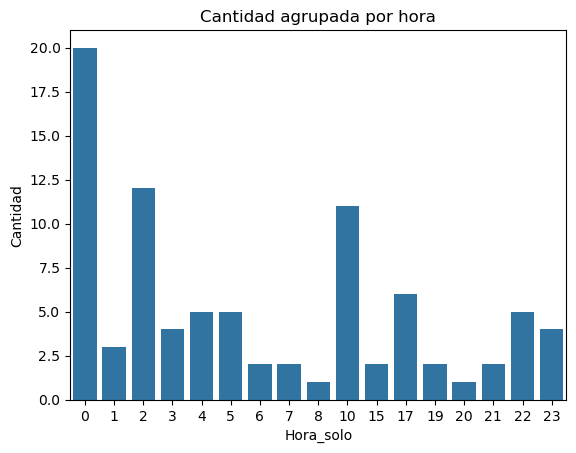

In [17]:
#creamos el gráfico de barras para poder visualizar la información
sns.barplot(data=df_analisis, x='Hora_solo', y='Cantidad')
plt.title("Cantidad agrupada por hora")
plt.show()

In [86]:
#hacemos un nuevo dataframes para realizar una_regresiondf_regresion lineal
df_regresion = yt_copia[['Hora', 'Vistas']].copy()
# para generalizar más solo nos centraremos en la hora
df_regresion['Hora'] = pd.to_datetime(df_regresion['Hora'], format='%H:%M:%S')
df_regresion['Hora_solo'] = df_regresion['Hora'].dt.hour
# agrupamos segun hora
maximo = df_regresion["Vistas"].max()
df_regresion = df_regresion[df_regresion['Vistas'] < maximo]
maximo = df_regresion["Vistas"].max()
df_regresion = df_regresion[df_regresion['Vistas'] < maximo]


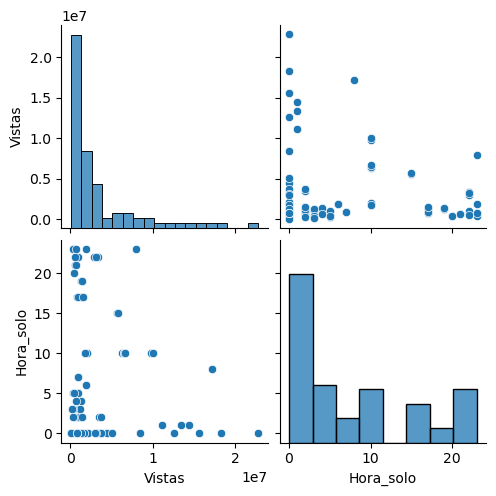

In [87]:
graficos = sns.pairplot(df_regresion)

In [89]:
#crearemos una regresion lineal para poder ver como se comporta la relacion entre las dos variables
#importar y crear nuestro transformador de valores X que depndera del gradp que queremos ocupar
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train, test = train_test_split(df_regresion, test_size=0.25, random_state=42)
y_train = np.array(train.Vistas)
y_test = np.array(test.Vistas)


X_train = np.array(train.Hora_solo)

X_train = X_train.reshape(X_train.shape[0], 1)


X_test = np.array(test.Hora_solo)
X_test = X_test.reshape(X_test.shape[0], 1)
transformer = PolynomialFeatures(8, include_bias=False)
expanded_test = transformer.fit_transform(X_test)
expanded_train = transformer.fit_transform(X_train)

#entrenar nuestro modelo coon los valores expandidos
reg_poly = LinearRegression().fit(expanded_train, y_train)

#realizar predicciones
y_pred_train = reg_poly.predict(expanded_train)
y_pred_test = reg_poly.predict(expanded_test)

print('coeficientes del modelo: \n', reg_poly.intercept_, reg_poly.coef_[0], reg_poly.coef_[1])

#evaluar rendimiento
rmse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print('\nConjunto de entrenamiento')
print('RMSE (train)', rmse_train)
print('R2(train)', r2_train)
print('\nConjunto de prueba')
print('RMSE (test)', rmse_test)
print('R2 (test)', r2_test)

coeficientes del modelo: 
 4355792.740000527 12110496.733194925 -12190695.909668103

Conjunto de entrenamiento
RMSE (train) 13147796152396.432
R2(train) 0.2723680862209632

Conjunto de prueba
RMSE (test) 26659547918361.676
R2 (test) 0.0837233888044403


## Analisis de datos

## Resumen de los resusltados

## ¿Qué podría salir mal?